<a href="https://colab.research.google.com/github/AkifDirican/ContextAI/blob/main/TopicIdentifiction_WebsiteLinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
import pickle
import re

In [3]:
# Load the dataset
names = ['URL', 'Category']
df = pd.read_csv('/content/URL Classification.csv', names=names, na_filter=False)

In [37]:
# Split the dataset into different categories
adult = df[0:2000]
arts = df[50000:52000]
business = df[520000:522000]
computers = df[535300:537300]
games = df[650000:652000]
health = df[710000:712000]
home = df[764200:766200]
kids = df[793080:795080]
news = df[839730:841730]
recreation = df[850000:852000]
reference = df[955250:957250]
science = df[1013000:1015000]

In [38]:
# Combine selected categories for the test data
test_data = pd.concat([adult, arts, business, computers, games, health, home, kids, news, recreation, reference, science], axis=0)

In [8]:
# Remove the selected categories from the original dataset for training
df.drop(df.index[0:2000], inplace=True)
df.drop(df.index[50000:52000], inplace=True)
df.drop(df.index[520000:522000], inplace=True)
df.drop(df.index[535300:537300], inplace=True)
df.drop(df.index[650000:652000], inplace=True)
df.drop(df.index[710000:712000], inplace=True)
df.drop(df.index[764200:766200], inplace=True)
df.drop(df.index[793080:795080], inplace=True)
df.drop(df.index[839730:841730], inplace=True)
df.drop(df.index[850000:852000], inplace=True)
df.drop(df.index[955250:957250], inplace=True)
df.drop(df.index[1013000:1015000], inplace=True)
df.drop(df.index[1143000:1145000], inplace=True)
df.drop(df.index[1293000:1295000], inplace=True)
df.drop(df.index[1492000:1494000], inplace=True)

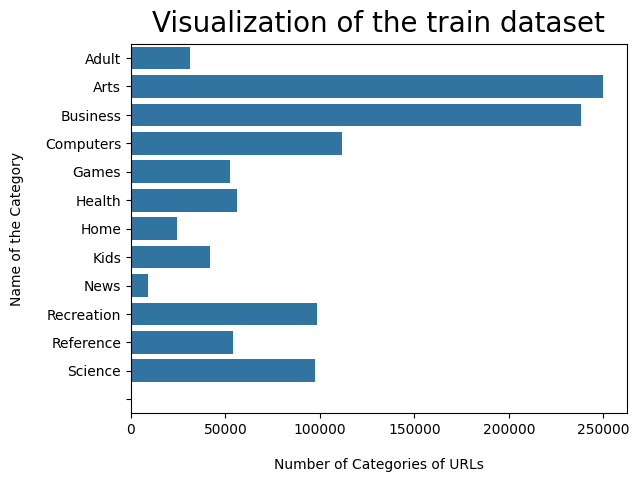

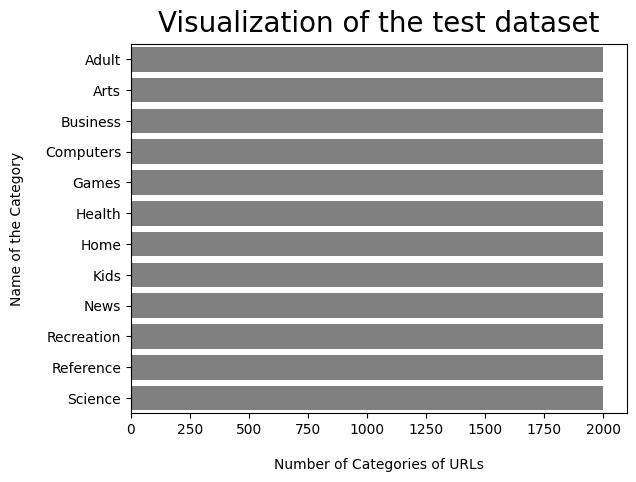

In [9]:
# Visualize the training and test data distributions
ax = sns.countplot(y="Category", data=df)
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
plt.show()

ax = sns.countplot(y="Category", data=test_data, color='gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
plt.show()

In [10]:
# Split the data into features (X) and labels (y)
X_train = df['URL']
y_train = df['Category']
X_test = test_data['URL']
y_test = test_data['Category']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Create a text processing and model pipeline
stemmed_count_vect = CountVectorizer(stop_words='english', ngram_range=(1,1))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                   ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                                         alpha=1e-5, max_iter=40, tol=None, random_state=32)),])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Train the model
gs_clf = gs_clf.fit(X_train, y_train)

In [17]:
# Predict the categories for the test data
y_pred = gs_clf.predict(X_test)

In [18]:
# Evaluate the model
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Adult     0.8893    0.1325    0.2306      2000
        Arts     0.5799    0.9450    0.7188      2000
    Business     0.7435    0.9785    0.8450      2000
   Computers     0.8095    0.9240    0.8629      2000
       Games     0.9585    0.9700    0.9642      2000
      Health     0.9844    0.9765    0.9804      2000
        Home     0.9644    0.9335    0.9487      2000
        Kids     0.9524    0.7810    0.8582      2000
        News     0.9912    0.8430    0.9111      2000
  Recreation     0.9385    0.9765    0.9571      2000
   Reference     0.8705    0.9145    0.8920      2000
     Science     0.9131    0.9410    0.9269      2000

    accuracy                         0.8597     24000
   macro avg     0.8829    0.8597    0.8413     24000
weighted avg     0.8829    0.8597    0.8413     24000



<ipython-input-19-46f8b619a0a8>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


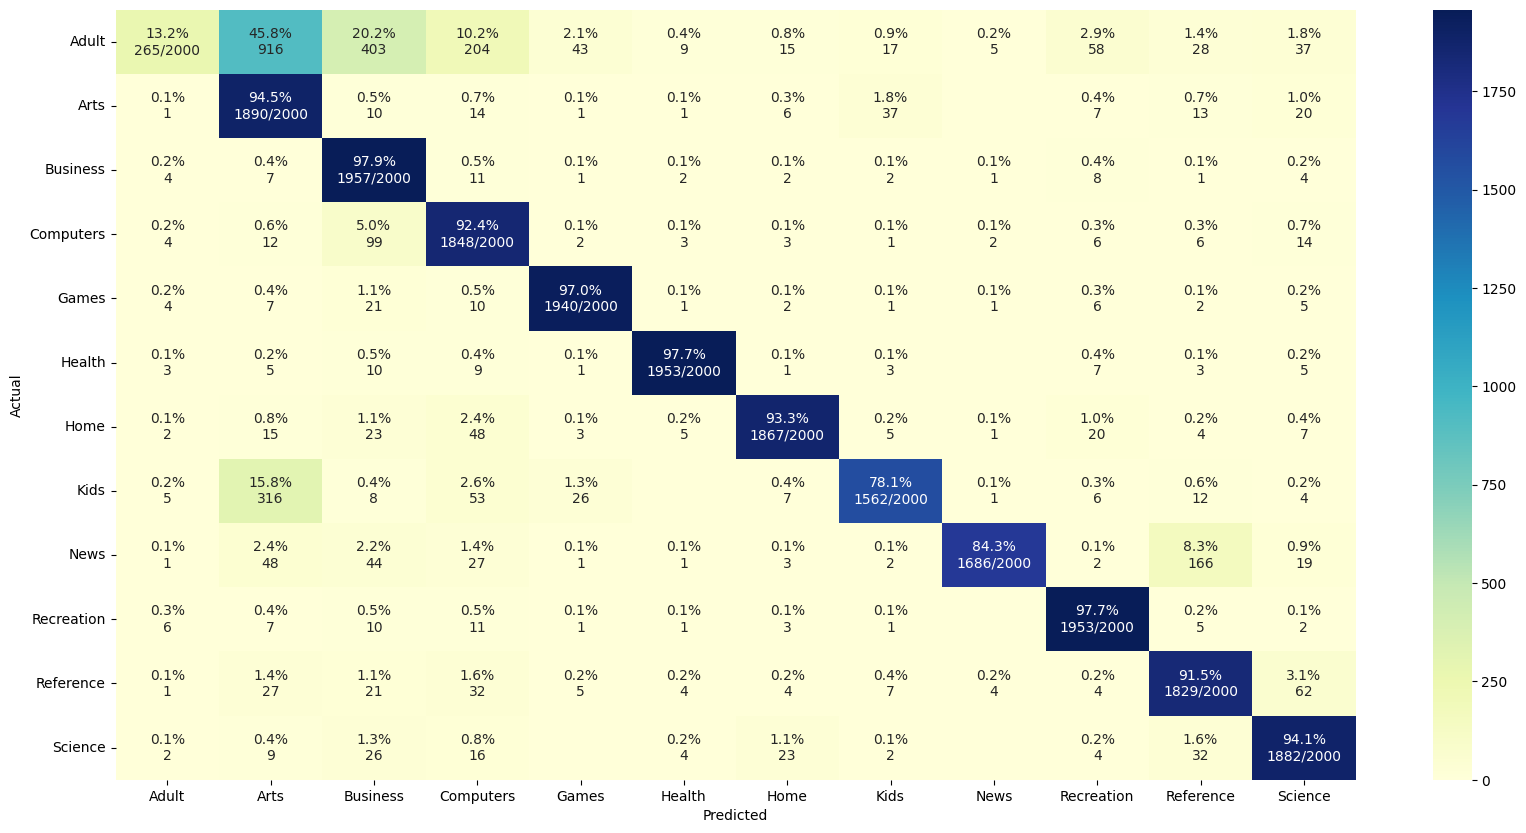

In [19]:
# Function to plot confusion matrix
def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap="YlGnBu", annot=annot, fmt='', ax=ax)

# Plot the confusion matrix
plot_cm(y_test, y_pred)

In [21]:
from sklearn import metrics

# Print accuracy scores
print('Train Accuracy = ', metrics.accuracy_score(y_train, gs_clf.predict(X_train)))
print('Test Accuracy = ', metrics.accuracy_score(y_test, gs_clf.predict(X_test)))

Train Accuracy =  0.9515790204528161
Test Accuracy =  0.8596666666666667


In [36]:
# Predict new URLs
print(gs_clf.predict(['https://www.nytimes.com/international/']))
print(gs_clf.predict(['https://www.economist.com/']))

['News']
['News']
['Business']
